In [1]:
!pip install -Uqq fastbook
import fastbook

import warnings 
warnings.filterwarnings('ignore')

In [2]:
from fastbook import *

# DataSet

In [6]:
path = Path('../archive/brain_tumor_dataset') 

In [7]:
Object_types = 'no','yes' # two types of category 

In [8]:
Object_types = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

#The most important parameter valid_pct=0.2. 
#This hold out 20% of the data.
#This 20% of the data is called the validation set;
#the remaining 80% is called the training set.
#seed=42 means same validation set every time 
#so if accuracy improve means model improve not because of data

In [10]:
dls = Object_types.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


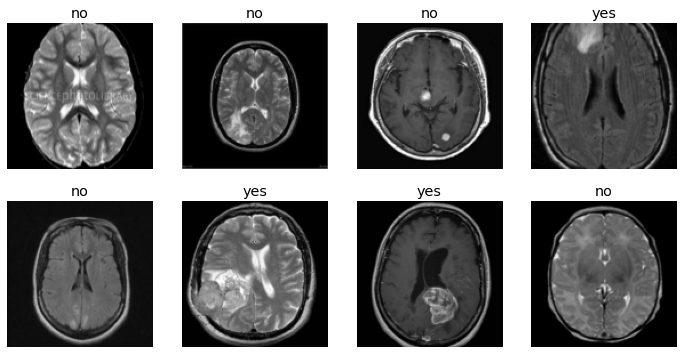

In [11]:
dls.valid.show_batch(max_n=8, nrows=2)

# squish method

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


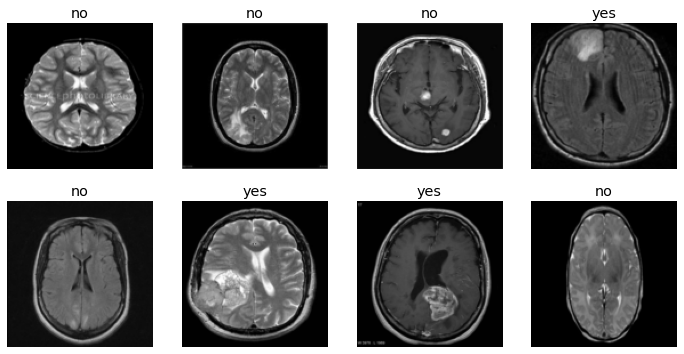

In [12]:
# using Squish method and making all the same size
Object_types = Object_types.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = Object_types.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

# Random Resize Crop


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


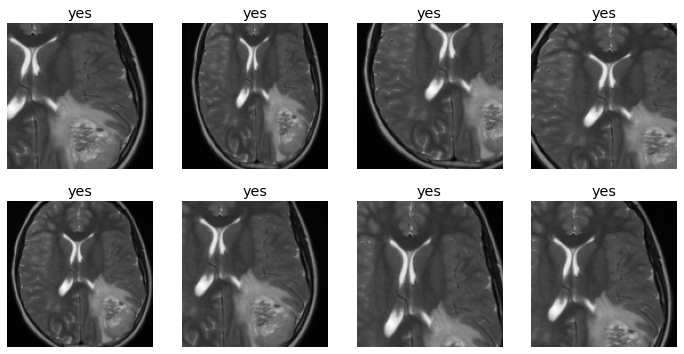

In [13]:
# Crop images from different angles and we take randam parts of same image
Object_types = Object_types.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = Object_types.dataloaders(path,bs=64)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

# cropmethod avoid the overfitting 

# resnet18 (NNs)

In [14]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\whKim/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.218869,2.903155,0.400000,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.878108,1.847408,0.380000,00:18
1,0.764544,1.018246,0.640000,00:22
2,0.697206,0.774661,0.760000,00:18
3,0.653948,0.787632,0.800000,00:16
4,0.607940,0.847441,0.780000,00:15


📌  Confusion_matrix

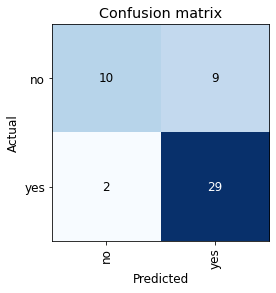

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

[resnet 34]

In [16]:
learn1 = cnn_learner(dls, resnet34, metrics=accuracy)
learn1.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\whKim/.cache\torch\hub\checkpoints\resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.385239,0.901685,0.480000,00:21


epoch,train_loss,valid_loss,accuracy,time
0,0.925361,0.687210,0.680000,00:27
1,0.800680,0.708356,0.780000,00:31
2,0.751204,0.754118,0.840000,00:27
3,0.680202,0.753433,0.860000,00:28
4,0.605310,0.768482,0.800000,00:27


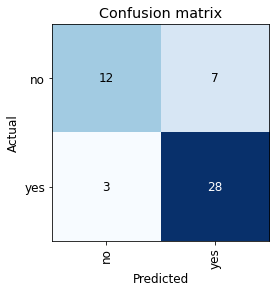

In [17]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

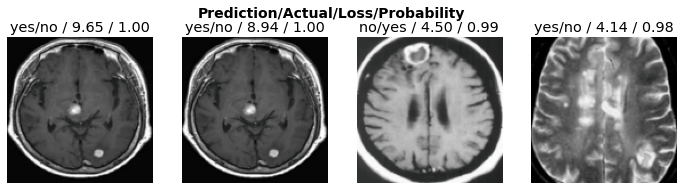

In [18]:
interp.plot_top_losses(4, nrows=1)

# Save Model

In [19]:
learn.export()

In [20]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [21]:
learn_inf = load_learner(path/'export.pkl')

To check how model working

In [22]:
learn_inf.predict('../archive/brain_tumor_dataset/no/12 no.jpg')

('no', TensorBase(0), TensorBase([0.9400, 0.0600]))

In [23]:
learn_inf.dls.vocab

['no', 'yes']

# Creating App from the Model

In [24]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [28]:
btn_upload = SimpleNamespace(data = ['../archive/brain_tumor_dataset/no/13 no.jpg'])

In [29]:
img = PILImage.create(btn_upload.data[-1])

In [30]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [31]:
pred,pred_idx,probs = learn_inf.predict(img)

In [32]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: no; Probability: 0.9975')

In [33]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [34]:
def on_click_classify(change):
 img = PILImage.create(btn_upload.data[-1])
 out_pl.clear_output()
 with out_pl: display(img.to_thumb(128,128))
 pred,pred_idx,probs = learn_inf.predict(img)
 lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)

In [35]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

# APP

In [38]:
from ipywidgets import *
VBox([widgets.Label('Select your image!'),
      btn_upload, btn_run, out_pl, lbl_pred])